<a href="https://colab.research.google.com/github/eileenthg/data-science-colabs/blob/main/GroupProject_1_TP2043_Play_with_Twitter_Twint_data_based_on_location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Name: Try and Error

Student List: (Student No and Name)
1. Muhammad Taufiq bin Hazarudin (A182673)  
2. Ooi Teng He (A179637)  
3. Peggy Yeo (A186179)
4. Eileen Tong Hui Guan (A180693)

# Step 1: Data Collection

## Collect your twitter data by using TWINT library

In [ ]:
!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt
import twint
import nest_asyncio
nest_asyncio.apply()

fatal: destination path 'twint' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38871 sha256=64354d06e6ed4bad8e290deb07feee5da86b3e0532649d6916cec9a095cf773d
  Stored in directory: /tmp/pip-ephem-wheel-cache-yb5o7nu8/wheels/f7/3e/11/2803f3c6890e87a9bec35bb8e37ef1ad0777a00f43e2441fb1
Successfully built twint
  Attempting uninstall: twint
    Found existing installation: twint 2.1.21
    Uninstalling twint-2.

## We will use PANDAS to store our data.

In [ ]:
import pandas

## Select any locations. You may change the locations, keyword search and since date. 

In [ ]:
# https://en.wikipedia.org/wiki/England#Regions,_counties,_and_districts
# https://en.wikipedia.org/wiki/Greater_London
# Full list of config.py: https://github.com/twintproject/twint/blob/master/twint/config.py
england = ["London", "Edinburgh", "Manchester"]
test_df = None
for city in england:
    print(city)
    c = twint.Config()
    c.Search = "food"
    c.Lang= "en"
    c.Pandas = True
    c.Since = "2022-04-17"
    c.Until = "2022-05-17"
    c.Near = city
    c.Limit = 100
    c.Store_csv = True
    c.Output = "./" + "data.csv"
    twint.run.Search(c)
    if test_df is None:
      test_df = twint.storage.panda.Tweets_df
    else:
      test_df = pandas.concat([test_df, twint.storage.panda.Tweets_df])
    

test_df.head()

London
1526351295845572608 2022-05-16 23:58:01 +0000 <browngirl_ange> My bf DoorDashed food for me and this little stain was on the bag🥹  https://t.co/f65CbXIrOj
1526350588782723073 2022-05-16 23:55:13 +0000 <jaykav74> @Heydawro @boohooMAN Defo mate, you bring the food and I’ll get the beers! 🍺
1526349963378163712 2022-05-16 23:52:44 +0000 <stupiddsamm> fermented foods are so good
1526349279572402182 2022-05-16 23:50:01 +0000 <NaturePortfolio> Elimination of hunger will require shifts in crop usage by 2030, according to a study in @NatureFoodJnl. Sub-Saharan Africa, however, will likely fall short even if all harvested calories are used directly as food.  https://t.co/Nd3VWzLMVU  https://t.co/C7JthnAxm8
1526349188820262912 2022-05-16 23:49:39 +0000 <P12InDaHouse> @tkn0801 Getting well hydrated can be a relief to soreness through the throat. Try eat cool and soft food, ice cream, yoghurt, something soothing. Avoid smoking zone or smoky areas like open kitchens. Herbal teas work. Those W

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1526351295845572608,1526351295845572608,1.652745e+12,2022-05-16 23:58:01,+0000,,My bf DoorDashed food for me and this little s...,en,[],[],...,,,,,,[],,,,
1,1526350588782723073,1525913910984904705,1.652745e+12,2022-05-16 23:55:13,+0000,,"@Heydawro @boohooMAN Defo mate, you bring the ...",en,[],[],...,,,,,,"[{'screen_name': 'Heydawro', 'name': 'Lee D ⚒'...",,,,
2,1526349963378163712,1526349963378163712,1.652745e+12,2022-05-16 23:52:44,+0000,,fermented foods are so good,en,[],[],...,,,,,,[],,,,
3,1526349279572402182,1526349279572402182,1.652745e+12,2022-05-16 23:50:01,+0000,,Elimination of hunger will require shifts in c...,en,[],[],...,,,,,,[],,,,
4,1526349188820262912,1526346635839938560,1.652745e+12,2022-05-16 23:49:39,+0000,,@tkn0801 Getting well hydrated can be a relief...,en,[],[],...,,,,,,"[{'screen_name': 'tkn0801', 'name': 'Celina🌙セリ...",,,,


## Alternative: If there was previously scraped data you would like to load instead, upload the csv, uncomment and run this segment

In [ ]:
#import pandas
#test_df = pandas.read_csv('data.csv')
#test_df.head()

## We will only consider tweets data. Other data will be ignored.

In [ ]:
tweet_text_raw = test_df["tweet"]
tweet_text = tweet_text_raw.reset_index()
tweet_text.drop(columns='index', inplace=True)

In [ ]:
tweet_text.head()

,tweet
0,My bf DoorDashed food for me and this little s...
1,"@Heydawro @boohooMAN Defo mate, you bring the ..."
2,fermented foods are so good
3,Elimination of hunger will require shifts in c...
4,@tkn0801 Getting well hydrated can be a relief...


In [ ]:
tweet_text.shape

(318, 1)


# Step 2: Text Preprocessing - Clean your data

#### You may start your text preprocessing. In this example, i have start my preprocessing with 



#### 2.1 Convert text to lower case
- for each tweet in tweet_text, it will be set to lower case.
- further text processing shall be stored in variable "tweets"

In [ ]:
tweets = tweet_text['tweet'].str.lower()
print(tweets.shape)
tweets

(318,)


0      my bf doordashed food for me and this little s...
1      @heydawro @boohooman defo mate, you bring the ...
2                            fermented foods are so good
3      elimination of hunger will require shifts in c...
4      @tkn0801 getting well hydrated can be a relief...
                             ...                        
313    gordon ramsay's food stars: all-new cooking co...
314    @jenny_1884 liverpools `spokeperson`saying its...
315    just dropped‼️ shop @zanouchi.com . . #mclaren...
316    a small tease of what's coming september 8th 👀...
317    our @alt_ht food truck is out every morning… r...
Name: tweet, Length: 318, dtype: object

#### 2.2 Keep only English tweets
Resources
- https://pypi.org/project/guess_language-spirit/

In [ ]:
# Automatic language screening
! pip install guess_language-spirit

from guess_language import guess_language

idList = []
for i in range(len(tweet_text)):
  lang = guess_language(tweets.iloc[i])
  if lang is not 'en':
     print('id:', i, end='\t')
     print('language:', lang)
     print(tweets.iloc[i])
     idList.append(i)

     |████████████████████████████████| 81 kB 4.0 MB/s 
  Created wheel for guess-language-spirit: filename=guess_language_spirit-0.5.3-py3-none-any.whl size=121216 sha256=9ffea5de4a8e8462e5694772654c2f3fc5f865a9b14c881d3a0c109a344f6510
  Stored in directory: /root/.cache/pip/wheels/ea/2f/46/5e92bc12077fb5d094daa274b59cc8a750dc7f72885ae7293e
Successfully built guess-language-spirit
id: 29	language: ja
@uk_food_diary 日本在住の外国人の方も多く受けるので、恐らく大丈夫ではないかと思います。電話できたら直接聞くととても親切ですよ。ご飯も美味しい！
id: 41	language: is
@uk_food_diary 本当です。必要なら郵送代くらい自分で出しますし。。。
id: 56	language: fr
@misbrr food courts slap
id: 59	language: ja
@uk_food_diary 4年前ですが、東京の新大久保/大久保駅近くの山手メディカルセンター(元・社保中)の人間ドックは、海外まで結果を郵送してくれました。封筒に自分で住所を書きました。総合病院なので安心感もありました。もしも東京に行かれることがありましたらお勧めです。ご参考までに。 https://t.co/3xv7soy4lh
id: 62	language: af
puzzo’s food is underwhelming
id: 63	language: is
@uk_food_diary 本当にこれ不便ですよね。。。
id: 74	language: eo
@mkharodia11 turkish food in istanbul was dead.
id: 89	language: is
@uk_food_diary 聖路加に相談されてみては？結果も

In [ ]:
# Manual removal
falsePositive = [57, 63, 75, 114, 152, 163, 196, 225, 228, 262, 376, 382, 394, 433, 471, 482, 515, 544, 547, 581]
idList = [i for i in idList if not i in falsePositive]
tweets.drop(idList, inplace=True)
tweets

0      my bf doordashed food for me and this little s...
1      @heydawro @boohooman defo mate, you bring the ...
2                            fermented foods are so good
3      elimination of hunger will require shifts in c...
4      @tkn0801 getting well hydrated can be a relief...
                             ...                        
313    gordon ramsay's food stars: all-new cooking co...
314    @jenny_1884 liverpools `spokeperson`saying its...
315    just dropped‼️ shop @zanouchi.com . . #mclaren...
316    a small tease of what's coming september 8th 👀...
317    our @alt_ht food truck is out every morning… r...
Name: tweet, Length: 303, dtype: object

#### 2.3 Text cleaning using clean-text module
Using the clean-text module to do the following
- Fix unicode errors
- Transliterate to closest ASCII representation
- lowercase text (just in case any were missed)
- normalize whitespaces
- remove line breaks [ALTERNATAIVE IS TO NORMALISE THEM. CONSIDER WHETHER LINE BREAKS SHOULD BE REMOVED]
- strip lines
- remove urls (aka hyperlinks)
- remove emails
- remove phone numbers
- remove numbers
- remove digits
- remove currency symbols
- remove emojis

Reference: https://pypi.org/project/clean-text/



In [ ]:
!pip install clean-text
from cleantext import clean

for i in range(len(tweets)):
  tweets.iloc[i] = clean(tweets.iloc[i],
      fix_unicode=True,               # fix various unicode errors
      to_ascii=True,                  # transliterate to closest ASCII representation
      lower=True,                     # lowercase text
      normalize_whitespace=True,      # replace one or more whitespace with a single whitespace equiavlent.
      no_line_breaks=True,            # fully strip line breaks as opposed to only normalizing them
      strip_lines=True,               # strip leading and trailing whitespace
      keep_two_line_breaks=False,     # (disabled) if there are two consecutive line breaks, keep them
      no_urls=True,                   # replace all URLs with a special token
      no_emails=True,                 # replace all email addresses with a special token
      no_phone_numbers=True,          # replace all phone numbers with a special token
      no_numbers=True,                # replace all numbers with a special token
      no_digits=True,                 # replace all digits with a special token
      no_currency_symbols=True,       # replace all currency symbols with a special token
      no_punct=False,                 # (disabled for hashtag removal later) remove punctuations
      no_emoji=True,                  # remove emoji
      replace_with_punct="",          # instead of removing punctuations you may replace them
      replace_with_url="",
      replace_with_email="",
      replace_with_phone_number="",
      replace_with_number="",
      replace_with_digit="",
      replace_with_currency_symbol="",
      lang="en"                       # set to 'de' for German special handling
  )


     |████████████████████████████████| 53 kB 1.3 MB/s 
     |████████████████████████████████| 175 kB 10.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=3887e3b84260d40b3f7f58bf6f4d9ef26cd61ea715aa26eccdfbd50ed2dbd205
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


#### 2.3 Manual @mentions removal
- Remove mentions
- Strip leading and trailing whitespace (in case any more appear after removing mentions)

In [ ]:
import re

for i in range(len(tweets)):
  tweets.iloc[i] = re.sub(r"\@\S+", "", tweets.iloc[i]) # Remove mention
  tweets.iloc[i] = tweets.iloc[i].strip() # Strip whitespace again

tweets

0      my bf doordashed food for me and this little s...
1      defo mate, you bring the food and i'll get the...
2                            fermented foods are so good
3      elimination of hunger will require shifts in c...
4      getting well hydrated can be a relief to soren...
                             ...                        
313    gordon ramsay's food stars: all-new cooking co...
314    liverpools 'spokeperson'saying its in support ...
315    just dropped shop  . . #mclaren #s #cars #clot...
316    a small tease of what's coming september th + ...
317    our  food truck is out every morning reducing ...
Name: tweet, Length: 303, dtype: object

#### 2.4 Split hashtag and glued words
Build a word list from scraped twitter text, dictionaries, and manual entries to split up words in a hashtag.

Converts #iamagluedtext to "i am a glued text"

References:
- https://stackoverflow.com/questions/20516100/term-split-by-hashtag-of-multiple-words
- https://stackoverflow.com/questions/4659524/how-to-sort-by-length-of-string-followed-by-alphabetical-order

Wordlist sources:
- Scraped twitter text
- nltk words.words()
- english-words
- country-list
- manual additions/removal

In [ ]:
# build wordlist
wordList = []

# extract words from tweets
for i in range(len(tweets)):
  text = re.sub(r'#\w+', '', tweets.iloc[i])
  wordList = wordList + [word for word in re.findall('\w+', text)]

def peekList(wordList):
  wordList.sort() # sorts normally by alphabetical order
  wordList.sort(key=len, reverse=True) # sorts by descending length
  print(wordList[0:100])
  print(wordList[100:200])
  print(wordList[-100:-1])
  print(len(wordList))

peekList(wordList)

['recommendations', 'recommendations', 'recommendations', 'disinformation', 'establishments', 'infrastructure', 'macronutrients', 'responsibility', 'responsibility', 'transformation', 'accommodation', 'approximately', 'breastfeeding', 'chrysanthemum', 'compassionate', 'compassionate', 'disappointing', 'disappointing', 'environmental', 'globalisation', 'indoctrinated', 'international', 'neighbourhood', 'opportunities', 'refrigerators', 'relationships', 'relationships', 'unmistakeable', 'unprecedented', 'additionally', 'biochemistry', 'biodiversity', 'biodiversity', 'caterpillars', 'consequences', 'consistently', 'conversation', 'depredations', 'disaffection', 'disappointed', 'exaggeration', 'hypocritical', 'increasingly', 'increasingly', 'increasingly', 'millionsxare', 'observations', 'organisation', 'particularly', 'quadriplegic', 'requirements', 'shareholders', 'specifically', 'supermarkets', 'supermarkets', 'unbelievable', 'unregistered', 'volunteering', 'alternative', 'apocalyptic',

In [ ]:
# manually check for glued words here and remove from wordlist
gluedWords = ['sandwichangelsgroup']
wordList = [i for i in wordList if not i in gluedWords]
peekList(wordList)

['recommendations', 'recommendations', 'recommendations', 'disinformation', 'establishments', 'infrastructure', 'macronutrients', 'responsibility', 'responsibility', 'transformation', 'accommodation', 'approximately', 'breastfeeding', 'chrysanthemum', 'compassionate', 'compassionate', 'disappointing', 'disappointing', 'environmental', 'globalisation', 'indoctrinated', 'international', 'neighbourhood', 'opportunities', 'refrigerators', 'relationships', 'relationships', 'unmistakeable', 'unprecedented', 'additionally', 'biochemistry', 'biodiversity', 'biodiversity', 'caterpillars', 'consequences', 'consistently', 'conversation', 'depredations', 'disaffection', 'disappointed', 'exaggeration', 'hypocritical', 'increasingly', 'increasingly', 'increasingly', 'millionsxare', 'observations', 'organisation', 'particularly', 'quadriplegic', 'requirements', 'shareholders', 'specifically', 'supermarkets', 'supermarkets', 'unbelievable', 'unregistered', 'volunteering', 'alternative', 'apocalyptic',

In [ ]:
# extract words from nltk words.words()
import nltk
nltk.download('words')
from nltk.corpus import words

# regex matching to ensure only individual words are extracted.
dictWords = [i for i in words.words() if re.fullmatch('\w+', i)]
print(dictWords)

wordList = wordList + dictWords
peekList(wordList)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# extract words from english-words module
# https://pypi.org/project/english-words/
! pip install english-words
from english_words import english_words_lower_alpha_set
# english word set that is all lowercase with no punctuation
dict2Word = list(english_words_lower_alpha_set)

# regex matching to ensure only individual words are extracted.
dict2Word = [i for i in dict2Word if re.fullmatch('\w+', i)]
print(dict2Word)

wordList = wordList + dict2Word
peekList(wordList)

     |████████████████████████████████| 1.1 MB 4.5 MB/s 
  Created wheel for english-words: filename=english_words-1.1.0-py3-none-any.whl size=1106680 sha256=cec017b3c996c03d32c00a7c5b3f3ac0b9f576bc5ce25c40079d798c3a5d9431
  Stored in directory: /root/.cache/pip/wheels/25/3d/4c/12a119ce90b46b4f90f9ddf41d719ecabb40faec6103379fc8
Successfully built english-words
['soc', 'pall', 'emphases', 'chen', 'gibe', 'vegetable', 'artisan', 'excretory', 'james', 'bookseller', 'essential', 'sagacity', 'euridyce', 'melcher', 'stupor', 'appalachia', 'cerium', 'teahouse', 'banquet', 'subsistent', 'snider', 'smutty', 'decouple', 'hideaway', 'hypochlorous', 'dockside', 'groundskeep', 'tread', 'chugging', 'krieger', 'woman', 'setscrew', 'ferruginous', 'chromatography', 'liable', 'scopic', 'chase', 'berg', 'host', 'casein', 'hopkinsian', 'pinto', 'gunderson', 'lutanist', 'gigawatt', 'psychopathic', 'treadle', 'plumb', 'pointwise', 'wife', 'answer', 'wart', 'worktable', 'vagrant', 'anterior', 'rattail', 'pla

In [ ]:
# add country names from country-list module
# https://pypi.org/project/country-list/
! pip3 install twokenize 
import twokenize
! pip install country-list
from country_list import countries_for_language

countryNames = [i[1] for i in countries_for_language('en')]
countryNames = " ".join(word for word in countryNames)
countryNames = countryNames.lower()

countryNames = twokenize.tokenize(countryNames)
countryNames = [i for i in countryNames if re.fullmatch('\w+', i)]
print(countryNames)

wordList = wordList + countryNames
peekList(wordList)

     |████████████████████████████████| 1.5 MB 4.9 MB/s 
['afghanistan', 'åland', 'islands', 'albania', 'algeria', 'american', 'samoa', 'andorra', 'angola', 'anguilla', 'antarctica', 'antigua', 'barbuda', 'argentina', 'armenia', 'aruba', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bermuda', 'bhutan', 'bolivia', 'bosnia', 'herzegovina', 'botswana', 'bouvet', 'island', 'brazil', 'british', 'indian', 'ocean', 'territory', 'british', 'virgin', 'islands', 'brunei', 'bulgaria', 'burkina', 'faso', 'burundi', 'cambodia', 'cameroon', 'canada', 'cape', 'verde', 'caribbean', 'netherlands', 'cayman', 'islands', 'central', 'african', 'republic', 'chad', 'chile', 'china', 'christmas', 'island', 'cocos', 'keeling', 'islands', 'colombia', 'comoros', 'congo', 'brazzaville', 'congo', 'kinshasa', 'cook', 'islands', 'costa', 'rica', 'côte', 'croatia', 'cuba', 'curaçao', 'cyprus', 'czechia', 'denmark', 'djibouti', 'dominica

In [ ]:
# additional words added after manual screening of output
# added -ing and plural forms since they can mess up subsequent words if not parsed properly
addList = ['seo', 'tesla','cdo','tomorrows','papers','sustainable','twitter','2022','gcses','playing','biochemistry','wef','thfc','mcdonalds','fyp','holborn','tiktok','jabbed','shortages','recipes','podcast','podcasting','prioritising','ref','2021','jubilee','lies','talks','national','firstmates','firstmate','fitness','didsbury','frize','media','marketing','services','foodie','online','advertising','advertise','ad','tips','recipes','ideas','fostering','communities','fcf','mclaren','cars','clothing','zalando','ootd','holidays','dubai','hoodies','hoodie','womens','excellence', 'whats',' yer','chaat','training','tonic','ska','radio']
wordList = wordList + [i for i in addList if re.fullmatch('\w+', i)]

In [ ]:
# if some words are causing trouble, remove them here
removeList = ['foods']
wordList = [i for i in wordList if not i in removeList]

In [ ]:
# Final filtering and reordering

# convert to set to remove duplicates, then reconvert back to list
wordList = list(set(wordList))
peekList(wordList)

['formaldehydesulphoxylate', 'pathologicopsychological', 'scientificophilosophical', 'tetraiodophenolphthalein', 'thyroparathyroidectomize', 'Pseudolamellibranchiata', 'anthropomorphologically', 'blepharosphincterectomy', 'epididymodeferentectomy', 'formaldehydesulphoxylic', 'gastroenteroanastomosis', 'hematospectrophotometer', 'macracanthrorhynchiasis', 'pancreaticoduodenostomy', 'pathologicohistological', 'pericardiomediastinitis', 'phenolsulphonephthalein', 'philosophicotheological', 'pseudolamellibranchiate', 'scientificogeographical', 'thymolsulphonephthalein', 'transubstantiationalist', 'Prorhipidoglossomorpha', 'anatomicophysiological', 'aquopentamminecobaltic', 'blepharoconjunctivitis', 'cholecystenterorrhaphy', 'cholecystoduodenostomy', 'choledochoduodenostomy', 'counterexcommunication', 'dacryocystoblennorrhea', 'dacryocystosyringotomy', 'deanthropomorphization', 'duodenocholecystostomy', 'electroencephalography', 'electrotelethermometer', 'hexamethylenetetramine', 'hexanitro

In [ ]:
# Format wordList for regex
wordListRegex = '|'.join(wordList)
wordListRegex = wordListRegex.lower()
wordListRegex

'formaldehydesulphoxylate|pathologicopsychological|scientificophilosophical|tetraiodophenolphthalein|thyroparathyroidectomize|pseudolamellibranchiata|anthropomorphologically|blepharosphincterectomy|epididymodeferentectomy|formaldehydesulphoxylic|gastroenteroanastomosis|hematospectrophotometer|macracanthrorhynchiasis|pancreaticoduodenostomy|pathologicohistological|pericardiomediastinitis|phenolsulphonephthalein|philosophicotheological|pseudolamellibranchiate|scientificogeographical|thymolsulphonephthalein|transubstantiationalist|prorhipidoglossomorpha|anatomicophysiological|aquopentamminecobaltic|blepharoconjunctivitis|cholecystenterorrhaphy|cholecystoduodenostomy|choledochoduodenostomy|counterexcommunication|dacryocystoblennorrhea|dacryocystosyringotomy|deanthropomorphization|duodenocholecystostomy|electroencephalography|electrotelethermometer|hexamethylenetetramine|hexanitrodiphenylamine|historicocabbalistical|hydropneumopericardium|hyperconscientiousness|laparocolpohysterotomy|lympha

In [ ]:
# Hashtag and word splitting sequence
def splitHashTag(hashTag):
  tagWords = []
  for wordSequence in re.findall('(?:' + wordListRegex + ')+', hashTag): 
    for word in re.findall(wordListRegex, wordSequence):
      tagWords.append(word)
  return tagWords
    

for i in range(len(tweets)):
  text = tweets.iloc[i].split()
  locList = []
  hashtagList = []
  newText = text.copy()
  for word in text:
    if word[0] == '#' or len(word) > 25: #reasoning of using 25, https://en.wikipedia.org/wiki/Longest_word_in_English#Major_dictionaries, see line from citation 17
      tagWords = splitHashTag(word)
      print("Hashtag:", word)
      print("Split", tagWords)
      locList.append(text.index(word))
      hashtagList.append(tagWords)
  for a in reversed(range(len(locList))):
    del newText[locList[a]]
    for j in reversed(range(len(hashtagList[a]))):
      newText.insert(locList[a], hashtagList[a][j])
  out = " ".join(word for word in newText)
  print(out)
  tweets.iloc[i] = out

tweets

my bf doordashed food for me and this little stain was on the bag
defo mate, you bring the food and i'll get the beers!
fermented foods are so good
elimination of hunger will require shifts in crop usage by , according to a study in sub-saharan africa, however, will likely fall short even if all harvested calories are used directly as food.
getting well hydrated can be a relief to soreness through the throat. try eat cool and soft food, ice cream, yoghurt, something soothing. avoid smoking zone or smoky areas like open kitchens. herbal teas work. those wong lo kat drinks you had last time or cool chrysanthemum tea
refrigerators are an apartment amenity because they can help keep food cold.
i love vegetalia, super casual, not fancy but great food. both locations are great but born is quieter. it's vegetarian but loads of vegan options! also vacka in poblenou is amazing, much fancier than vegetalia.
Hashtag: #italianfood
Split ['italian', 'food']
Hashtag: #food
Split ['food']
Hashtag: #t

0      my bf doordashed food for me and this little s...
1      defo mate, you bring the food and i'll get the...
2                            fermented foods are so good
3      elimination of hunger will require shifts in c...
4      getting well hydrated can be a relief to soren...
                             ...                        
313    gordon ramsay's food stars: all-new cooking co...
314    liverpools 'spokeperson'saying its in support ...
315    just dropped shop . . mclaren s cars clothing ...
316    a small tease of what's coming september th + ...
317    our food truck is out every morning reducing f...
Name: tweet, Length: 303, dtype: object

#### 2.5 Reclean text using clean-text module
Text will be cleaned again due to addition of words from the splitting hash tag procedure
Using the clean-text module to do the following
- Fix unicode errors
- Transliterate to closest ASCII representation
- lowercase text (just in case any were missed)
- normalize whitespaces
- remove line breaks [ALTERNATAIVE IS TO NORMALISE THEM. CONSIDER WHETHER LINE BREAKS SHOULD BE REMOVED]
- strip lines
- remove urls (aka hyperlinks)
- remove emails
- remove phone numbers
- remove numbers
- remove digits
- remove currency symbols
- remove emojis

Reference: https://pypi.org/project/clean-text/



In [ ]:
!pip install clean-text
from cleantext import clean

for i in range(len(tweets)):
  tweets.iloc[i] = clean(tweets.iloc[i],
      fix_unicode=True,               # fix various unicode errors
      to_ascii=True,                  # transliterate to closest ASCII representation
      lower=True,                     # lowercase text
      normalize_whitespace=True,      # replace one or more whitespace with a single whitespace equiavlent.
      no_line_breaks=True,            # fully strip line breaks as opposed to only normalizing them
      strip_lines=True,               # strip leading and trailing whitespace
      keep_two_line_breaks=False,     # (disabled) if there are two consecutive line breaks, keep them
      no_urls=True,                   # replace all URLs with a special token
      no_emails=True,                 # replace all email addresses with a special token
      no_phone_numbers=True,          # replace all phone numbers with a special token
      no_numbers=True,                # replace all numbers with a special token
      no_digits=True,                 # replace all digits with a special token
      no_currency_symbols=True,       # replace all currency symbols with a special token
      no_punct=False,                 # (disabled for contraction expansion) remove punctuations
      no_emoji=True,                  # remove emoji
      replace_with_punct="",          # instead of removing punctuations you may replace them
      replace_with_url="",
      replace_with_email="",
      replace_with_phone_number="",
      replace_with_number="",
      replace_with_digit="",
      replace_with_currency_symbol="",
      lang="en"                       # set to 'de' for German special handling
  )

  tweets

#### 2.6 Expand contractions
Module: https://pypi.org/project/contractions/

Documentation: https://github.com/kootenpv/contractions

In [ ]:
# Contraction
!pip install contractions
import contractions

expanded_words = []   
contractions.add("ill","i will")
contractions.add("cant","cannot")
contractions.add("id","i would")
for i in range(len(tweets)):
  tweets.iloc[i] = contractions.fix(tweets.iloc[i])

tweets

     |████████████████████████████████| 106 kB 7.0 MB/s 
     |████████████████████████████████| 287 kB 51.9 MB/s 


0      my bf doordashed food for me and this little s...
1      defo mate, you bring the food and i will get t...
2                            fermented foods are so good
3      elimination of hunger will require shifts in c...
4      getting well hydrated can be a relief to soren...
                             ...                        
313    gordon ramsay's food stars: all-new cooking co...
314    liverpools 'spokeperson'saying its in support ...
315    just dropped shop . . mclaren s cars clothing ...
316    a small tease of what is coming september th +...
317    our food truck is out every morning reducing f...
Name: tweet, Length: 303, dtype: object

#### 2.7 Remove punctuation using clean-text module
Saved punctuation removal for last as it is required for hashtag and contraction detection

In [ ]:
!pip install clean-text
from cleantext import clean

for i in range(len(tweets)):
  tweets.iloc[i] = clean(tweets.iloc[i],
      no_punct=True,                 # remove punctuations
      replace_with_punct="",         # instead of removing punctuations you may replace them
      lang="en"                      # set to 'de' for German special handling
  )

tweets

0      my bf doordashed food for me and this little s...
1      defo mate you bring the food and i will get th...
2                            fermented foods are so good
3      elimination of hunger will require shifts in c...
4      getting well hydrated can be a relief to soren...
                             ...                        
313    gordon ramsays food stars allnew cooking compe...
314    liverpools spokepersonsaying its in support of...
315    just dropped shop mclaren s cars clothing zala...
316    a small tease of what is coming september th +...
317    our food truck is out every morning reducing f...
Name: tweet, Length: 303, dtype: object

#### 2.8 Drop duplicate tweets
Best time to check for dupliates now that everything is standardised. (Word variations do not count.)

In [ ]:
print(tweets.duplicated().sum())
tweets.drop_duplicates(inplace = True)

0


#### 2.9 Tokenization
Done tweet by tweet.

The next 3 steps will use the tokens for further processing.


Module/tokenizer used: https://pypi.org/project/twokenize/

In [ ]:
# regular tokenizer
# from nltk.tokenize import word_tokenize
# tokens = word_tokenize(text)

# alternative tokenizer made for twitter text corpus:
# https://pypi.org/project/twokenize/
# This will not split links

! pip3 install twokenize 
import twokenize

tweet_tokens = []
for i in range(len(tweets)):
  tokens = twokenize.tokenize(tweets.iloc[i])
  tweet_tokens.append(tokens)
# store tokens by each tweet

tweet_tokens[0]

['my',
 'bf',
 'doordashed',
 'food',
 'for',
 'me',
 'and',
 'this',
 'little',
 'stain',
 'was',
 'on',
 'the',
 'bag']

#### 2.10 Canonical
Manually expands shorthands and text speak with proper words.

In [ ]:
# Canonical

dictMap = {'u':'you',
        'prep':'prepare',
        'bf':'boyfriend',
        'ok':'okay'
        }

for i in range(len(tweet_tokens)):
    tweet_tokens[i] = [dictMap[word] if word in dictMap else word for word in tweet_tokens[i]]

tweet_tokens[0]

['my',
 'boyfriend',
 'doordashed',
 'food',
 'for',
 'me',
 'and',
 'this',
 'little',
 'stain',
 'was',
 'on',
 'the',
 'bag']

#### 2.11 Spelling correction
Since dictionaries are constantly expanding and new words are constantly appearing, it is probably best to use a dedicated module. (https://towardsdatascience.com/build-a-spelling-corrector-program-in-python-46bc427cf57f).

Module: https://pypi.org/project/textblob/ 


Notes: Canonisation done first, then spelling correction, otherwise spelling correction may autocorrect away slangs and shorthands.

Example, 
- canonisation: bf -> boyfriend
- spell corrector: bf -> of


In [ ]:
!pip install textblob

from textblob import Word
for i in range(len(tweet_tokens)):
  text = tweet_tokens[i]
  newText = []
  for word in text:
    wordBlob = Word(word)
    correct = wordBlob.correct()
    newText.append(correct)
  tweet_tokens[i] = newText.copy()

tweet_tokens[0]

['my',
 'boyfriend',
 'doordashed',
 'food',
 'for',
 'me',
 'and',
 'this',
 'little',
 'stain',
 'was',
 'on',
 'the',
 'bag']

#### 2.12 Lemmatization
Make synonyms the same word. Convert to root word (if possible).

In [ ]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
nltk.download('wordnet') #dictionary for english
for i in range(len(tweet_tokens)):
  tokens = tweet_tokens[i]
  result_lemmatization_noun = [wnl.lemmatize(i, 'n') for i in tokens]
  result_lemmatization_adj = [wnl.lemmatize(i, 'a') for i in result_lemmatization_noun]
  result_lemmatization_root = [wnl.lemmatize(i, 'r') for i in result_lemmatization_adj]
  result_lemmatization_verb = [wnl.lemmatize(i, 'v') for i in result_lemmatization_root]

  #print(result_lemmatization_noun)
  #print(result_lemmatization_adj)
  #print(result_lemmatization_root)
  #print(result_lemmatization_verb)
  tweet_tokens[i] = result_lemmatization_verb.copy()

tweet_tokens[0]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['my',
 'boyfriend',
 'doordashed',
 'food',
 'for',
 'me',
 'and',
 'this',
 'little',
 'stain',
 'wa',
 'on',
 'the',
 'bag']

#### Final datasets

In [ ]:
# tweet saved as tokens
for i in tweet_tokens:
 print(i)

['my', 'boyfriend', 'doordashed', 'food', 'for', 'me', 'and', 'this', 'little', 'stain', 'wa', 'on', 'the', 'bag']
['defy', 'mate', 'you', 'bring', 'the', 'food', 'and', 'i', 'will', 'get', 'the', 'bee']
['torment', 'food', 'be', 'so', 'good']
['elimination', 'of', 'hunger', 'will', 'require', 'shift', 'in', 'crop', 'usage', 'by', 'accord', 'to', 'a', 'study', 'in', 'subsaharan', 'africa', 'however', 'will', 'likely', 'fall', 'short', 'even', 'if', 'all', 'harvest', 'calorie', 'be', 'use', 'directly', 'a', 'food']
['get', 'well', 'hydrate', 'can', 'be', 'a', 'relief', 'to', 'softness', 'through', 'the', 'throat', 'try', 'eat', 'cool', 'and', 'soft', 'food', 'ice', 'cream', 'yoghurt', 'something', 'soothe', 'avoid', 'smoke', 'zone', 'or', 'smoke', 'area', 'like', 'open', 'kitchen', 'verbal', 'tear', 'work', 'those', 'long', 'lo', 'at', 'drink', 'you', 'have', 'last', 'time', 'or', 'cool', 'chrysanthemum', 'tea']
['refrigerator', 'be', 'an', 'apartment', 'amnesty', 'because', 'they', 'ca

In [ ]:
# tweet saved as strings
tweets = [" ".join(word for word in i) for i in tweet_tokens]
for i in tweets:
  print(i)

my boyfriend doordashed food for me and this little stain wa on the bag
defy mate you bring the food and i will get the bee
torment food be so good
elimination of hunger will require shift in crop usage by accord to a study in subsaharan africa however will likely fall short even if all harvest calorie be use directly a food
get well hydrate can be a relief to softness through the throat try eat cool and soft food ice cream yoghurt something soothe avoid smoke zone or smoke area like open kitchen verbal tear work those long lo at drink you have last time or cool chrysanthemum tea
refrigerator be an apartment amnesty because they can help keep food cold
i love vegetarian super casual not fancy but great food both location be great but bear be quiet it be vegetarian but load of begin option also vaska in poblenou be amaze much fancy than vegetarian
the best italian food be not in italy but in boliviguay watch this video to learn more italian food food tell tula
cook food be for night tha

# Step 3: Visualize your data. In this example, we will use wordcloud to visualize your data.

Firstly, we need to combine our tokens/words back together to create a big string. We will count how many words we have.



In [ ]:
text = " ".join(tweet for tweet in tweets)
# checking how many words we have
print("Words: {}".format(len(text)))

Words: 43424


Next, import the word cloud library. You also can add stopwords in this process.

this stopword code is not completed yet. Add stopwords from nltk - refer to lab1 activity.

In [ ]:
import nltk
from nltk.corpus import stopwords 

nltk.download('stopwords')
nltk.download('punkt')

stopwords = set(stopwords.words('english'))
stopwords.update(["da", "fez", "amp", "it","u","be","wa","ha", "food"]) # add more stopwords here.

# regular tokenizer
# from nltk.tokenize import word_tokenize
# tokens = word_tokenize(text)

# alternative tokenizer made for twitter text corpus:
# https://pypi.org/project/twokenize/
# This will not split links

! pip3 install twokenize 
import twokenize
tokens = twokenize.tokenize(text)


# remove stopwords
tokens = [i for i in tokens if not i in stopwords]
print("\nWord tokenization output:")
print(tokens)

text = " ".join(tweet for tweet in tokens)
text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!

Word tokenization output:
['boyfriend', 'doordashed', 'little', 'stain', 'bag', 'defy', 'mate', 'bring', 'get', 'bee', 'torment', 'good', 'elimination', 'hunger', 'require', 'shift', 'crop', 'usage', 'accord', 'study', 'subsaharan', 'africa', 'however', 'likely', 'fall', 'short', 'even', 'harvest', 'calorie', 'use', 'directly', 'get', 'well', 'hydrate', 'relief', 'softness', 'throat', 'try', 'eat', 'cool', 'soft', 'ice', 'cream', 'yoghurt', 'something', 'soothe', 'avoid', 'smoke', 'zone', 'smoke', 'area', 'like', 'open', 'kitchen', 'verbal', 'tear', 'work', 'long', 'lo', 'drink', 'last', 'time', 'cool', 'chrysanthemum', 'tea', 'refrigerator', 'apartment', 'amnesty', 'help', 'keep', 'cold', 'love', 'vegetarian', 'super', 'casual', 'fancy', 'great', 'location',

'boyfriend doordashed little stain bag defy mate bring get bee torment good elimination hunger require shift crop usage accord study subsaharan africa however likely fall short even harvest calorie use directly get well hydrate relief softness throat try eat cool soft ice cream yoghurt something soothe avoid smoke zone smoke area like open kitchen verbal tear work long lo drink last time cool chrysanthemum tea refrigerator apartment amnesty help keep cold love vegetarian super casual fancy great location great bear quiet vegetarian load begin option also vaska poblenou amaze much fancy vegetarian best italian italy boliviguay watch video learn italian tell tula cook night pay bill rest need find way kitchen way locally counteract global issue time feel conflict environmental pressure bank england warn apocalyptic global shortage telegraph captain need punjabi master volunteer enemy try poison trick captain kitchen house vehicle need security even empty lower animal welfare standard alw

In [ ]:
# import the wordcloud library
from wordcloud import WordCloud
# Instantiate a new wordcloud.
wordcloud = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        max_words = 300,
        stopwords = [],collocations=False)

# Apply the wordcloud to the text.
wordcloud.generate(text)

(-0.5, 599.5, 299.5, -0.5)

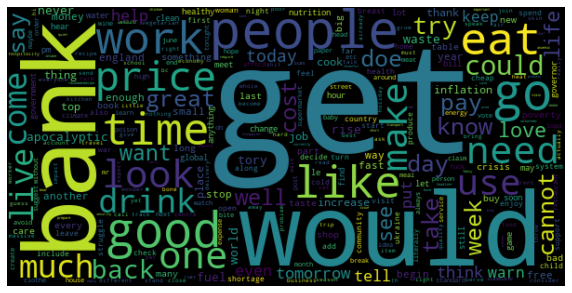

In [ ]:
import matplotlib.pyplot as plt
# create a figure
fig, ax = plt.subplots(1,1, figsize = (10,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")